In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as t

In [2]:
'''
Simplest problem finding a shortest path to endpoint
 0(st)  2    -1
 3      4    10(en)
 1      2     3

And defining state as index of the above matrix i.e. s(start) = (0,0), s(end)=(1,2)
 '''

'\nSimplest problem finding a shortest path to endpoint\n 0(st)  2    -1\n 3      4    10(en)\n 1      2     3\n\nAnd defining state as index of the above matrix i.e. s(start) = (0,0), s(end)=(1,2)\n '

In [2]:
Rew = np.array([[0, 2, -1], [3, 4, 10], [1, 2, 3]]) #np.array([[0, 2, -1], [3, 4, 10], [1, 2, 3]])
Rew #Reward matrix

array([[ 0,  2, -1],
       [ 3,  4, 10],
       [ 1,  2,  3]])

In [3]:
V = np.zeros((3,3))
V #Value matrix intialised

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
#act = ['L', 'R', 'U', 'D'] Actions available at a node
def Act(s): #s=s(x,y)
    ls = []
    for i in range(len(s)):
        if i==0:
            if s[i]==0:
                ls.append('D')
            elif s[i]==2:
                ls.append('U')
            else:
                ls.append('D')
                ls.append('U')
        elif i==1:
            if s[i]==0:
                ls.append('R')
            elif s[i]==2:
                ls.append('L')
            else:
                ls.append('R')
                ls.append('L')
    return ls

In [5]:
Act((0,0))

['D', 'R']

In [13]:
dir = {'L':(0,-1), 'R':(0,1), 'U':(-1,0), 'D':(1,0)}
#act = ['L', 'R', 'U', 'D']

def Trans(s1, act, s2):  #s1 ---act---> s2 Transition probabilities
    if s1[0]==1 and s1[1]==2:
        return 0
    else:
        if (np.array(dir[act])+np.array(s1))[0]==s2[0] and (np.array(dir[act])+np.array(s1))[1]==s2[1]:
            return 1.0 - (len(Act(s1))-1)*0.1 #probability of intended direction
        else:
            return 0.1 #probability of veering off the intended direction

In [7]:
Trans((0,0), 'R', (1,0))

0.1

In [8]:
np.array((1,1))[0]==(np.array(dir['L'])+np.array((1,0)))[0] and np.array((1,1))[0]==(np.array(dir['L'])+np.array((1,0)))[1]

False

In [14]:
def succ(s): #Successor of the given point
    ls = []
    for i in range(len(Act(s))):
        if s[0]==1 and s[1]==2: #endpoint
            ls.append(s)
        else:
            if Act(s)[i]=='L':
                ls.append((s[0],s[1]-1))
            elif Act(s)[i]=='R':
                ls.append((s[0],s[1]+1))
            elif Act(s)[i]=='U':
                ls.append((s[0]-1,s[1]))
            elif Act(s)[i]=='D':
                ls.append((s[0]+1,s[1]))
    return ls

In [10]:
succ((1,1))

[(2, 1), (0, 1), (1, 2), (1, 0)]

In [11]:
Rew[succ((1,1))[1]]

2

In [15]:
def MDP(Rew, Act, gam):
    V = np.zeros((3,3)) #Value matrix intialised
    x, y = 0, 0
    n = 0
    for m in range(3):
        if m==0:
            for i in range(len(V)):
                for j in range(len(V[i])):
                    Q = []
                    for k in range(len(Act((i,j)))): #Maximising to choose which one yields the most
                        q = 0
                        for l in range(len(succ((i,j)))): #Summation of all posssible successor (expectation)
                            q = q  + Trans((i,j), Act((i,j))[k], succ((i,j))[l])*(Rew[succ((i,j))[l]] + gam*V[succ((i,j))[l]])
                            Q.append(q)
                    V[i,j] = max(Q)
            x = V[1,1]
            n = n + 1

        elif m==1:
            for i in range(len(V)):
                for j in range(len(V[i])):
                    Q = []
                    for k in range(len(Act((i,j)))): #Maximising to choose which one yields the most
                        q = 0
                        for l in range(len(succ((i,j)))): #Summation of all posssible successor (expectation)
                            q = q  + Trans((i,j), Act((i,j))[k], succ((i,j))[l])*(Rew[succ((i,j))[l]] + gam*V[succ((i,j))[l]])
                            Q.append(q)
                    V[i,j] = max(Q)
            y = V[1,1]
            n = n + 1
        elif m==2:
            while abs((y-x)/y) > 0.1:
                x = y
                for i in range(len(V)):
                    for j in range(len(V[i])):
                        Q = []
                        for k in range(len(Act((i,j)))): #Maximising to choose which one yields the most
                            q = 0
                            for l in range(len(succ((i,j)))): #Summation of all posssible successor (expectation)
                                q = q  + Trans((i,j), Act((i,j))[k], succ((i,j))[l])*(Rew[succ((i,j))[l]] + gam*V[succ((i,j))[l]])
                                Q.append(q)
                        V[i,j] = max(Q)
                y = V[1,1]
                n = n + 1
    return V,n

In [19]:
MDP(Rew, Act, 0.9)

(array([[17.99688088, 18.48499965, 17.77284971],
        [18.85685543, 18.75604081,  0.        ],
        [19.88662482, 20.53332887, 19.43199639]]),
 5)

In [ ]:
#Analysis of code when varying discount factor (gamma)

In [20]:
Gam = np.linspace(0, 1, 11)
Time = []
N = []
for gam in Gam:
    start = t.time()
    N.append(MDP(Rew, Act, gam)[1])
    end = t.time()
    Time.append(end-start)
Time = np.array(Time)
N = np.array(N)

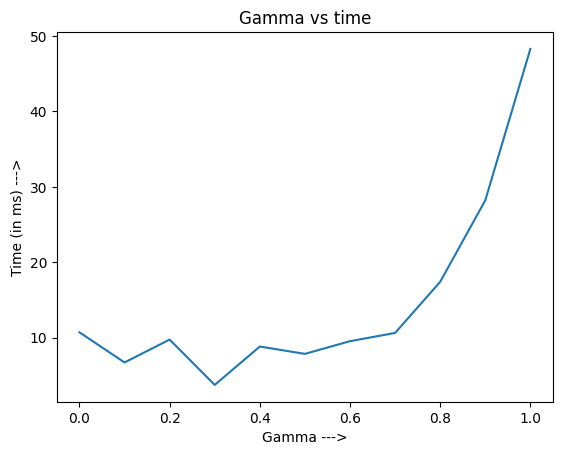

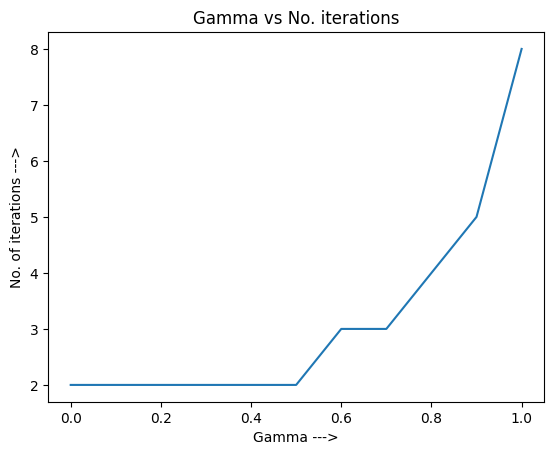

In [21]:

plt.title("Gamma vs time")
plt.xlabel("Gamma --->")
plt.ylabel("Time (in ms) --->")
plt.plot(Gam, Time*1000)
plt.show()

plt.title("Gamma vs No. iterations")
plt.xlabel("Gamma --->")
plt.ylabel("No. of iterations --->")
plt.plot(Gam, N)
plt.show()